<a href="https://colab.research.google.com/github/Neoneto/Coding_Dojo_Week8/blob/main/Intro_to_Boosting_Exercise_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Intro to Boosting (Core)
Submitted by Kenneth Alaba

## Data Loading and Pre-Processing

In [59]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
from google.colab import drive
drive.mount('/content/drive')

df0 = pd.read_csv('/content/drive/MyDrive/Coding Dojo/08 Week 8: Boosting/census_income - census_income.csv')
df0.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-class
0,0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [61]:
# Check the dataframe
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      32561 non-null  int64 
 1   age             32561 non-null  int64 
 2   workclass       32561 non-null  object
 3   education       32561 non-null  object
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  income-class    32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [62]:
# Determine the classes  
df0['income-class'].unique()

array(['<=50K', '>50K'], dtype=object)

### Mapping categorical columns

In [63]:
# Copy the original dataframe into a new dataframe
df = df0.copy()

# map the categorical columns

# Import
from sklearn.compose import make_column_selector

# determine categorical columns
cat_selector = make_column_selector(dtype_include='object')
cat_data = df[cat_selector(df)]

# for each categorical columns
for c_name in cat_data.columns:
    
    # print the column name
    print(c_name)

    # get unique values from that column
    values_list = df[c_name].unique()

    # Create the integer classes for mappring
    indeces = np.arange(len(values_list))

    # create the dictionary
    col_dictionary = dict(zip(values_list,indeces))

    # Print the maping used for reference
    print(col_dictionary)

    # replace values in that column
    df[c_name].replace(col_dictionary, inplace=True)

df.head()

workclass
{'State-gov': 0, 'Self-emp-not-inc': 1, 'Private': 2, 'Federal-gov': 3, 'Local-gov': 4, '?': 5, 'Self-emp-inc': 6, 'Without-pay': 7, 'Never-worked': 8}
education
{'Bachelors': 0, 'HS-grad': 1, '11th': 2, 'Masters': 3, '9th': 4, 'Some-college': 5, 'Assoc-acdm': 6, 'Assoc-voc': 7, '7th-8th': 8, 'Doctorate': 9, 'Prof-school': 10, '5th-6th': 11, '10th': 12, '1st-4th': 13, 'Preschool': 14, '12th': 15}
marital-status
{'Never-married': 0, 'Married-civ-spouse': 1, 'Divorced': 2, 'Married-spouse-absent': 3, 'Separated': 4, 'Married-AF-spouse': 5, 'Widowed': 6}
occupation
{'Adm-clerical': 0, 'Exec-managerial': 1, 'Handlers-cleaners': 2, 'Prof-specialty': 3, 'Other-service': 4, 'Sales': 5, 'Craft-repair': 6, 'Transport-moving': 7, 'Farming-fishing': 8, 'Machine-op-inspct': 9, 'Tech-support': 10, '?': 11, 'Protective-serv': 12, 'Armed-Forces': 13, 'Priv-house-serv': 14}
relationship
{'Not-in-family': 0, 'Husband': 1, 'Wife': 2, 'Own-child': 3, 'Unmarried': 4, 'Other-relative': 5}
race
{'

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-class
0,0,39,0,0,0,0,0,0,0,2174,0,40,0,0
1,1,50,1,0,1,1,1,0,0,0,0,13,0,0
2,2,38,2,1,2,2,0,0,0,0,0,40,0,0
3,3,53,2,2,1,2,1,1,0,0,0,40,0,0
4,4,28,2,0,1,3,2,1,1,0,0,40,1,0


In [65]:
# Define the targets and features
X = df.drop(columns = 'income-class')
y = df['income-class']

## Train-Test-Split

In [66]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Gradient Bosting


In [67]:
# train the model
# using default parameters
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [83]:
# calculate the model scores

gbc_train = gbc.score(X_train, y_train)
gbc_test = gbc.score(X_test, y_test)

print(f'Training accuracy:{gbc_train:.3f}')
print(f'Testing accuracy:{gbc_test:.3f}' )

Training accuracy:0.866
Testing accuracy:0.869


In [81]:
# get the parameters used for the initial model
gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

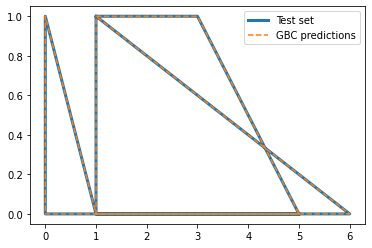

In [84]:
# Creates predictions from the test features using initial model
gbc_pred = gbc.predict(X_test)

# Visualize the test set and the predictions
n = 10
plt.plot(X_test.education[:n], y_test[:n], label = 'Test set', linewidth = 3)
plt.plot(X_test.education[:n], gbc_pred[:n], linestyle = '--',label = 'GBC predictions')
plt.legend()

In [93]:
# Simple hyperparameter tuning using GridSearchCV

# Import
from sklearn.model_selection import GridSearchCV

# Create the parameter grid
param_grid = {#'ccp_alpha': [0,1],
 #'criterion': 'friedman_mse',
 #'init': None,
 #'learning_rate': 0.1,
 #'loss': 'deviance',
 'max_depth': [3,4],
 #'max_features': None,
 #'max_leaf_nodes': None,
 #'min_impurity_decrease': 0.0,
 'min_samples_leaf': [1,2],
 'min_samples_split': [2,4],
 #'min_weight_fraction_leaf': 0.0,
 #'n_estimators': [50,100,200],
 #'n_iter_no_change': None,
 #'random_state': None,
 #'subsample': 1.0,
 #'tol': 0.0001,
 #'validation_fraction': 0.1,
 'verbose': [0],
 #'warm_start': False
 }

# Create a based model
#gbc_gs = GradientBoostingClassifier()
# Instantiate the grid search model
gcb_gs = GridSearchCV(estimator = gbc, param_grid = param_grid, cv = 3, n_jobs = -1)

# Fit the grid search to the data
gcb_gs.fit(X_train, y_train)
gcb_gs.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4, 'verbose': 0}

In [95]:
# calculate the model scores

gbc_gs_train = gcb_gs.score(X_train, y_train)
gbc_gs_test = gcb_gs.score(X_test, y_test)

print(f'Training accuracy:{gbc_gs_train:.3f}')
print(f'Testing accuracy:{gbc_gs_test:.3f}' )

Training accuracy:0.873
Testing accuracy:0.875


## LightGBM

In [96]:
#import
from lightgbm import LGBMClassifier

# Instantiate and fit gradient boosting classifier
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

LGBMClassifier()

In [97]:
# calculate the model scores

lgbm_train = lgbm.score(X_train, y_train)
lgbm_test = lgbm.score(X_test, y_test)

print(f'Training accuracy:{lgbm_train:.3f}')
print(f'Testing accuracy:{lgbm_test:.3f}' )

Training accuracy:0.887
Testing accuracy:0.878


In [98]:
# get the parameters used for the initial model
lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [99]:
LGBMClassifier?

In [101]:
# Gridsearch
params = {'boosting_type': ['gbdt', 'rf'],
          'class_weight': [None, 'balanced'],
          'num_leaves': [31,32,33],

          }

# grid search to find best hyperparameters
lgbm_gs = GridSearchCV(lgbm, params, cv = 5)

# Fit the grid search to the data
lgbm_gs.fit(X_train, y_train)
lgbm_gs.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/lightgbm/sklearn.py", line 744, in fit
    callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/lightgbm/sklearn.py", line 544, in fit
    callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py", line 197, in train
    boost

{'boosting_type': 'gbdt', 'class_weight': None, 'num_leaves': 32}

In [103]:
# calculate the model scores

lgbm_gs_train = lgbm_gs.score(X_train, y_train)
lgbm_gs_test = lgbm_gs.score(X_test, y_test)

print(f'Training accuracy:{lgbm_gs_train:.3f}')
print(f'Testing accuracy:{lgbm_gs_test:.3f}' )

Training accuracy:0.889
Testing accuracy:0.875


The training score increased by a small value but the test score decreased by a smal value.the gain is not worth it and the default model is better.

## XGBoost

In [104]:
# import
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier()

In [105]:
# calculate the model scores

xgb_train = xgb.score(X_train, y_train)
xgb_test = xgb.score(X_test, y_test)

print(f'Training accuracy:{xgb_train:.3f}')
print(f'Testing accuracy:{xgb_test:.3f}' )

Training accuracy:0.864
Testing accuracy:0.866


In [106]:
# get the parameters used for the initial model
xgb.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [107]:
# Gridsearch
params = {'max_depth': [3,4,5],
          'n_estimators': [50,100,150],
          }

# grid search to find best hyperparameters
xgb_gs = GridSearchCV(xgb, params, cv = 5)

# Fit the grid search to the data
xgb_gs.fit(X_train, y_train)
xgb_gs.best_params_

{'max_depth': 5, 'n_estimators': 150}

In [108]:
# calculate the model scores

xgb_gs_train = xgb_gs.score(X_train, y_train)
xgb_gs_test = xgb_gs.score(X_test, y_test)

print(f'Training accuracy:{xgb_gs_train:.3f}')
print(f'Testing accuracy:{xgb_gs_test:.3f}' )

Training accuracy:0.883
Testing accuracy:0.875


## Model Comparison

In [114]:
# Display the accuracies of the models
compare = pd.DataFrame([])
compare['Model'] = ['Gradient Boosting', 'LightGBM', 'XGBost']
compare['Train_Acuracy'] = [gbc_gs_train, lgbm_train, xgb_gs_train]
compare['Test_Acuracy'] = [gbc_gs_test, lgbm_test, xgb_gs_test]
compare

,Model,Train_Acuracy,Test_Acuracy
0,Gradient Boosting,0.873342,0.874831
1,LightGBM,0.887265,0.878025
2,XGBost,0.882883,0.875322


Of the three models used, the LightGBM model has the best performance for this dataset even with just using the default hyperparameters.